# Digital Image
* numeric representation of 2-D image
* Common formats: JPEG, GIF, TIFF, PNG, PPM
* Color image (RGB) and grey scale image (0 to 255 pixels, 0(black), 255(white))

(276, 183)


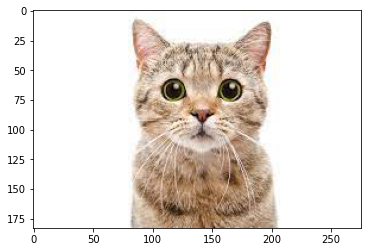

In [6]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

pil_im = Image.open("cat.jfif")
print(pil_im.size)

plt.imshow(pil_im)
plt.show()

# Basic operations
* Image open and save

(-0.5, 313.5, 159.5, -0.5)

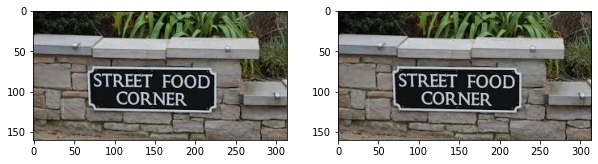

In [7]:
# image open

image = Image.open("sign.jfif")

image.save("sign_save.jpg")

image_save = Image.open("sign_save.jpg")

row = 1
columns = 2

fig = plt.figure(figsize=(10,7))  #10 = side ways distance, 7 = up and down

fig.add_subplot(row, columns, 1)
plt.imshow(image)
plt.axis("on")

fig.add_subplot(row, columns, 2)
plt.imshow(image_save)
plt.axis("on")

# Transformation

(-0.5, 399.5, 399.5, -0.5)

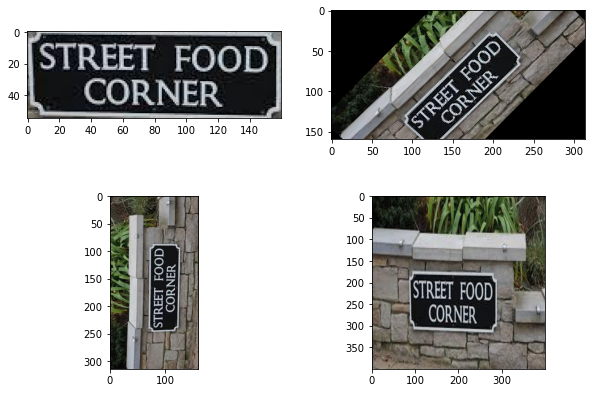

In [8]:
image = Image.open("sign_save.jpg")

region = (67,70,227,125)     
#65:  left side(0) - board left(65), 
#70:  from top(0) - top sign board(70)
#225: from borad left(65) - board right distance 227
#125: from top sign board(70) - bottom sign borad distance 125

row = 2
col = 2

fig = plt.figure(figsize=(10,7))
fig.add_subplot(row,col,1)
cropImg = image.crop(region)
plt.imshow(cropImg)
plt.axis("on")

fig.add_subplot(row,col,2)
img_rotate = image.rotate(45)
plt.imshow(img_rotate)
plt.axis("on")

fig.add_subplot(row,col,3)
img_trans = image.transpose(Image.ROTATE_90)
plt.imshow(img_trans)
plt.axis("on")

fig.add_subplot(row,col,4)
img_resize = image.resize((400,400))
plt.imshow(img_resize)
plt.axis("on")

# Conversion

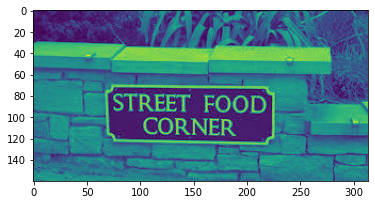

In [9]:
img_convert = image.convert("L")
plt.imshow(img_convert)

# Binarization

(-0.5, 313.5, 159.5, -0.5)

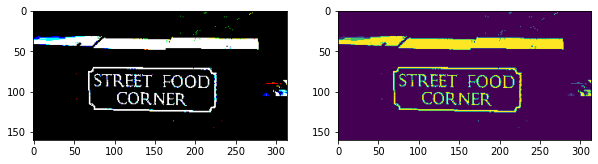

In [10]:
white = 255
black = 0

image_point = image.point(lambda x: white if x > 175 else black)
img_binary = image_point.convert("L")

row = 1
columns = 2

fig = plt.figure(figsize=(10,7))

fig.add_subplot(row, columns, 1)
plt.imshow(image_point)
plt.axis("on")

fig.add_subplot(row, columns, 2)
plt.imshow(img_binary)
plt.axis("on")

# Commmon filtering

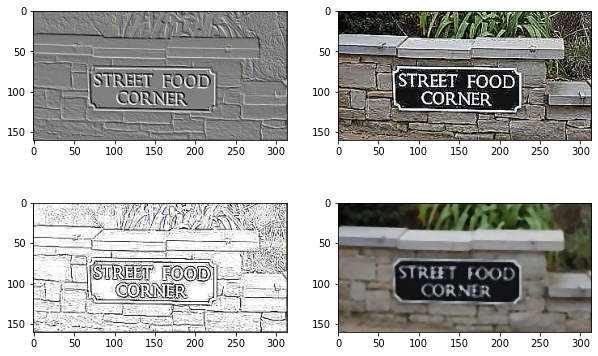

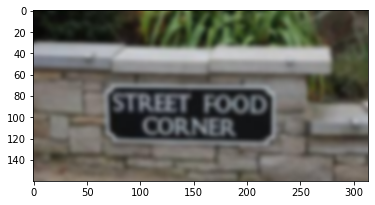

In [11]:
from PIL import ImageFilter

row = 3
col = 2

fig = plt.figure(figsize=(10,10))

fig.add_subplot(row, col, 1)
img_filter = image.filter(ImageFilter.EMBOSS)
plt.imshow(img_filter)
plt.axis("on")

fig.add_subplot(row, col, 2)
img_filter = image.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(img_filter)
plt.axis("on")

fig.add_subplot(row, col, 3)
img_filter = image.filter(ImageFilter.CONTOUR)
plt.imshow(img_filter)
plt.axis("on")

fig.add_subplot(row, col, 4)
img_filter = image.filter(ImageFilter.MedianFilter(5))
plt.imshow(img_filter)
plt.axis("on")
plt.show()

fig.add_subplot(row, col, 5)
img_filter = image.filter(ImageFilter.GaussianBlur(radius=2))
plt.imshow(img_filter)
plt.axis("on")
plt.show()

# Feature detection in Image

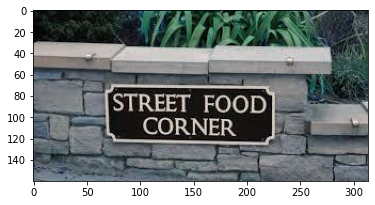

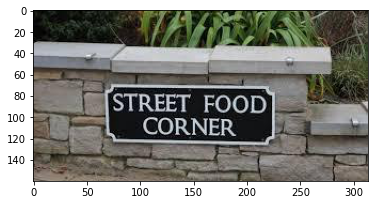

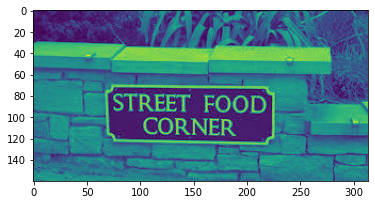

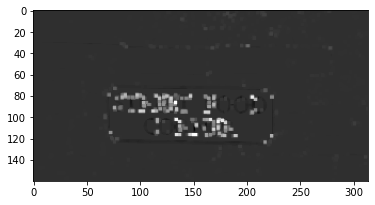

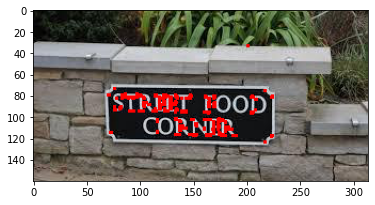

In [60]:
import cv2
import numpy as np

img = cv2.imread("sign_save.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.axis("on")
plt.show()

img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.axis("on")
plt.show()

img_gray_float = np.float32(img_gray)
dst = cv2.cornerHarris(img_gray_float,2,3,0.04)
dst = cv2.dilate(dst,None)
plt.imshow(dst, cmap=plt.cm.gray)
plt.show()

#Threshod
img_RGB[dst>0.15*dst.max()]=[255,0,0]
plt.imshow(img_RGB)
plt.show()

# Edge-based

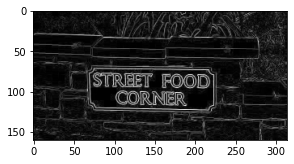

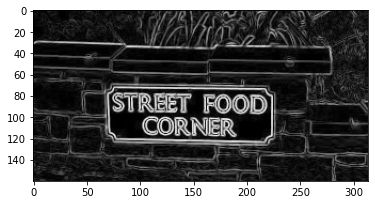

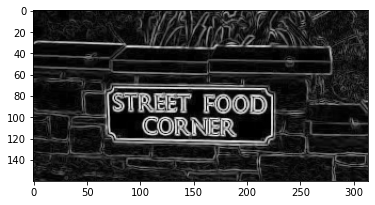

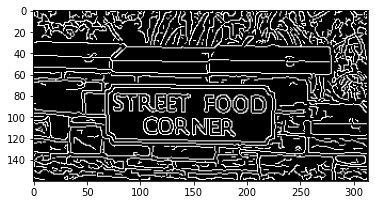

In [77]:
from skimage.filters import roberts, sobel, prewitt
from skimage import color, io, feature

img = io.imread("sign_save.jpg")
img_gray = color.rgb2gray(img)


row = 2
col = 2

fig =  plt.figure(figsize=(10,7))

fig.add_subplot(row, col, 1)
edge_robert = roberts(img_gray)
plt.imshow(edge_robert, cmap= plt.cm.gray)
plt.axis("on")
plt.show()

fig.add_subplot(row, col, 2)
edge_Sobel = sobel(img_gray)
plt.imshow(edge_Sobel, cmap= plt.cm.gray)
plt.axis("on")
plt.show()

fig.add_subplot(row, col, 3)
edge_prewitt = prewitt(img_gray)
plt.imshow(edge_prewitt, cmap= plt.cm.gray)
plt.show()

fig.add_subplot(row, col, 4)
edge_canny = feature.canny(img_gray)
plt.imshow(edge_canny, cmap= plt.cm.gray)
plt.show()

# Hough detection: For line detection

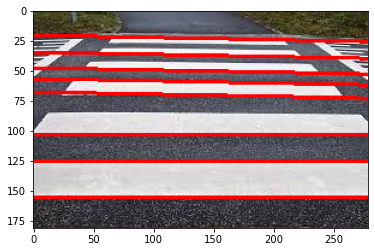

In [110]:
img_line = cv2.imread("line.jpg")
gray1 = cv2.cvtColor(img_line,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray1,10,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,145)

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 300*(-b))   #line distance
        y1 = int(y0 + 300*(a))
        x2 = int(x0 - 300*(-b))
        y2 = int(y0 - 300*(a))
        cv2.line(img_line,(x1,y1),(x2,y2),(0,0,255),2)
        
img_line = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)
plt.imshow(img_line, cmap=None)
plt.show()

# Hough detection: For circle detection

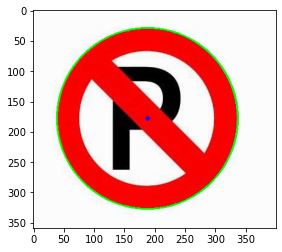

In [122]:
img_circle = cv2.imread("circle.jpg")
img_circle_gray = cv2.cvtColor(img_circle, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(img_circle_gray, cv2.HOUGH_GRADIENT,
                          1,20, param1=50, param2=30,
                          minRadius=145, maxRadius=500)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(img_circle,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img_circle,(i[0],i[1]),2,(255,0,0),3)
    
cimg = cv2.cvtColor(img_circle, cv2.COLOR_BGR2RGB)
plt.imshow(cimg, cmap=None)
plt.show()

# Region-based

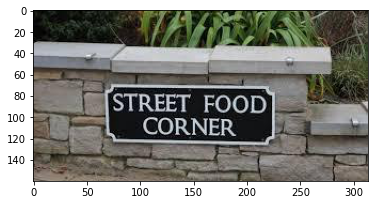

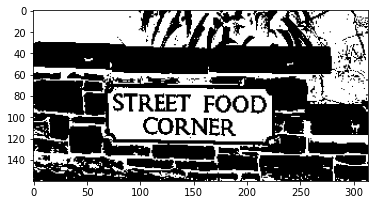

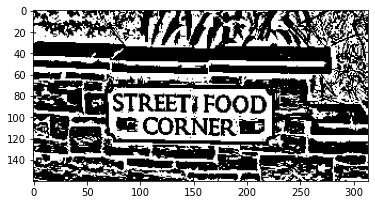

In [137]:
#Otsu's: Otsu's thresholding method involves iterating through all the possible threshold values and calculating a measure of spread for the pixel levels each side of the threshold
#Niblack: Niblack and Sauvola thresholds are local thresholding techniques that are useful for images where the background is not uniform, especially for text recognition 1, 2. Instead of calculating a single global threshold for the entire image, several thresholds are calculated for every pixel by using specific formulae that take into account the mean and standard deviation of the local neighborhood

from skimage.filters import threshold_otsu, threshold_niblack

img = io.imread("sign_save.jpg")
gray = color.rgb2gray(img)
plt.imshow(img,cmap=None)
plt.show()

img_otsu = threshold_otsu(gray)
binary_ostu = gray < img_otsu
plt.imshow(binary_ostu, cmap=plt.cm.gray)
plt.show()

img_nik = threshold_niblack(gray)
binary_nik = gray < img_nik
plt.imshow(binary_nik, cmap=plt.cm.gray)
plt.show()

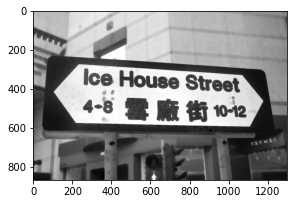

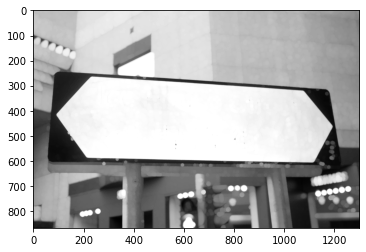

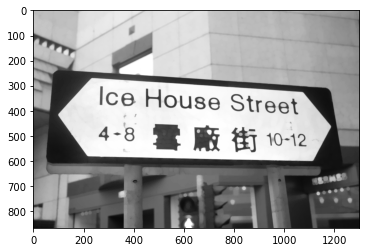

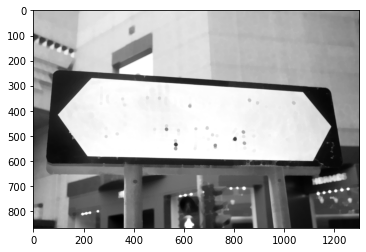

In [161]:
from skimage.morphology import erosion, dilation, opening, closing, disk

img = io.imread("region.jpg")
gray = color.rgb2gray(img)

fig = plt.figure(figsize=(10,7))

row = 2
col = 2

D = disk(6)
fig.add_subplot(row, col, 1)
img_erosion = erosion(gray, D)
plt.imshow(img_erosion, cmap=plt.cm.gray)
plt.show()

fig.add_subplot(row, col,2)
img_dilation = dilation(gray, D)
plt.imshow(img_dilation, cmap=plt.cm.gray)
plt.show()

fig.add_subplot(row, col, 3)
img_open = opening(gray, D)
plt.imshow(img_open, cmap=plt.cm.gray)
plt.show()

fig.add_subplot(row, col, 4)
img_close = closing(gray, D)
plt.imshow(img_close, cmap=plt.cm.gray)
plt.show()


# Color features

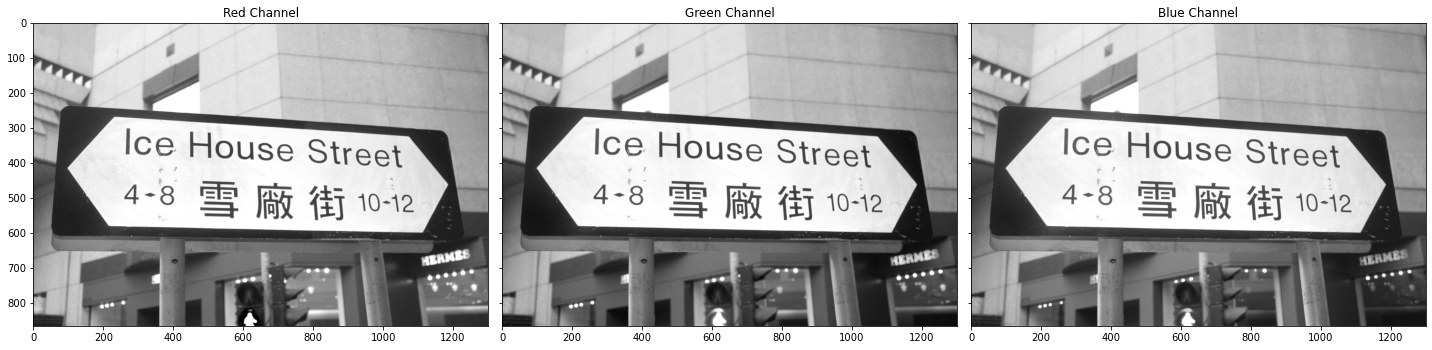

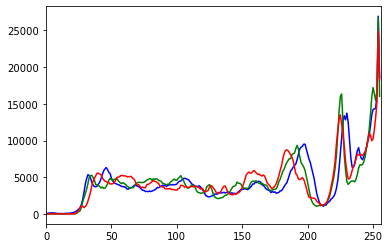

In [167]:
r, g, b = cv2.split(img)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(r, cmap=plt.cm.gray)
ax[0].set_title('Red Channel')

ax[1].imshow(g, cmap=plt.cm.gray)
ax[1].set_title('Green Channel')

ax[2].imshow(b, cmap=plt.cm.gray)
ax[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()